# Lecure 7.1 More data analysis with pandas

We are focusing on coding today. Make sure you ask for help when you get stuck, either from the intructor or your colleagues. A little bit of struggle is good, but don't bang your head against the wall!

Data analysis is a proccess of interaction with data, getting to know it, using descriptive statistics, seeing how variables are related. Once you get to know the data, then creative and interesting things can happen that bring new insight and help you develop a narrative about the data you are analysing

## 1. Warm up

### 1.1 
Code a function that given the area of a circle, returns both the radius and the circumference
### 1.2 
Add in an error statement if a negative area is passed to the function
### 1.3 
Use your function to plot radus and circumference for areas between 0 and 1000, counting by 20. Put both lines on one plot. Label your plot, and include a legend.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import pandas as pd

def circle(a):
    try:
        r = math.sqrt(a/np.pi)
        c = 2 * np.pi * r
        return r, c
    except ValueError:
        print("Math Error: Use non-negative numbers")

a_range = np.arange(0,1000, 20)
rads =[]
circums = []
for a in a_range:
    circ = circle(a)
    rads.append(circ[0])
    circums.append(circ[1])
    
# Plot
fig = plt.figure(figsize=(10,6), facecolor='papayawhip')
plt.plot(a_range, rads, label="Radius")
plt.plot(a_range, circums, label="Circumference")
plt.legend(prop={'size':16})
plt.xlabel("Area", fontsize=14)
plt.title("Radius and Circumference Given Area", fontsize=18)

Text(0.5, 1.0, 'Radius and Circumference Given Area')

## 2. TED Talk exercises

For the following, use the TED Talk dataset we used in week 5

### 2.1 Basics
How do you display all of the data types in a pandas data set? Demonstrate.

In [3]:
ted = pd.read_csv('ted.csv')
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

### 2.2 Working with data in pandas: sorting and plotting
#### 2.2.1 
Display just the name and duration of the talks.

In [4]:
nam_dur = ted[['name','duration']]
nam_dur.head(5)

,name,duration
0,Ken Robinson: Do schools kill creativity?,1164
1,Al Gore: Averting the climate crisis,977
2,David Pogue: Simplicity sells,1286
3,Majora Carter: Greening the ghetto,1116
4,Hans Rosling: The best stats you've ever seen,1190


#### 2.2.2
Now sort by duration. Display 1) the 10 shortest and 2) the 10 longest talks

In [5]:
# 10 shortest ted talks
nam_dur.sort_values(['duration']).head(10)
# 10 longest ted talks
nam_dur_long = nam_dur.sort_values(['duration']).tail(10)

#### 2.2.3
What is the 10th longest talk?

In [6]:
nam_dur_long.iloc[9]
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


#### 2.2.4
What unit of time is the duration in? How do you know?

In [7]:
dur_time = pd.to_datetime(ted.duration, unit='s')
ted['film_date'] = pd.to_datetime(ted.film_date, unit='s')
ted['published_date'] = pd.to_datetime(ted.published_date, unit='s')

ted.tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,2017-06-06,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,2017-09-19 20:00:16,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,2017-04-24,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,2017-09-20 15:02:17,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,2017-04-24,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,2017-09-21 15:01:35,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,2017-07-08,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,2017-09-21 20:00:42,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309
2549,8,With more than half of the world population li...,519,TED2017,2017-04-24,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,2017-09-22 15:00:22,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721


#### 2.2.5
Plot the durations as a histogram, using a sensible number of bins. Label your axes. How did you decide how many bins to use?

Text(0.5, 0, 'Time in ')

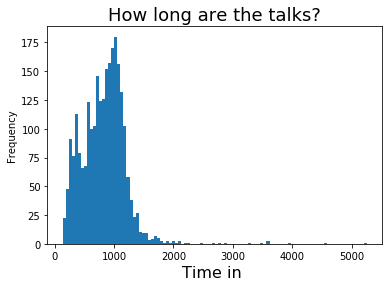

In [8]:
# using 100 bins becuase it looks about right
ted.duration.plot(kind='hist', bins=100)
plt.title("How long are the talks?", fontsize=18)
plt.xlabel('Time in ', fontsize=16)

#### 2.2.6
Now plot as a box plot. Explain what the box plot is showing: what is the box, what is the line in the middle, what are the dots?

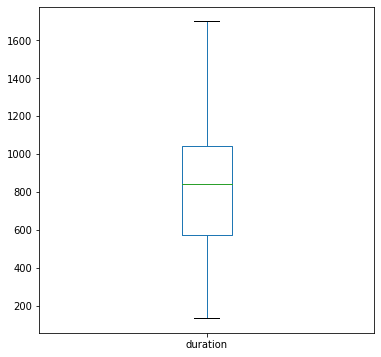

In [9]:
"""Box plot show data through there quartiles extending from Q1 to Q3
with a horizontal line at the median (Q2). 'Whiskers' extending from the
edges of the box depcit range, while circle points depict outliers"""
fig = plt.figure(figsize=(6,6))
#box = ted.boxplot(column='duration')
ted.loc[ted.duration < 1700, 'duration'].plot(kind='box')

#### 2.2.7
Find the median, mean, mode and standard deviation of the durations. Are these consistent with your plots above? Explain.

In [10]:
print(nam_dur.describe())
print("Median " + str(nam_dur.median()))
print("Mode " + str(nam_dur['duration'].mode()))

          duration
count  2550.000000
mean    826.510196
std     374.009138
min     135.000000
25%     577.000000
50%     848.000000
75%    1046.750000
max    5256.000000
Median duration    848.0
dtype: float64
Mode 0     848
1    1099
dtype: int64


#### 2.2.8
Is this a normal distribution? Explain. How does this affect your analysis above?
### Answer: 
Yes, because minus the outliers, the data is more or less evenly distributed over mean. We should remove the outliers from the above data

#### 2.3.1-4

Going back to the tutorial, make sure you have created the film_datetime variable

In the command:

ted.film_datetime.dt.year.value_counts().sort_index()

What do the dt, year, value_counts and sort_index commands do? Explain each one and demonstrate

In [11]:
ted.film_date.dt.year.value_counts().sort_index()
ted.ratings.tail()

2545    [{'id': 3, 'name': 'Courageous', 'count': 24},...
2546    [{'id': 22, 'name': 'Fascinating', 'count': 32...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...
2548    [{'id': 11, 'name': 'Longwinded', 'count': 3},...
2549    [{'id': 21, 'name': 'Unconvincing', 'count': 2...
Name: ratings, dtype: object

#### 2.3.2
Research another way to use the pandas datatime data to analyse the Ted Talks. Explain your methods

In [12]:
speaker = ted.main_speaker
speaker = speaker.tolist()
speaker = [x.split()[0] for x in speaker]

#### 2.3.3
Get creative! Now it is time for you to do some analysis on your own using the TED Talks dataset. Find a few ineresting ways to analyse this data set, which you will present to the class on Thursday.

In [13]:
import sys
!{sys.executable} -m pip install gender_guesser

### 2.3.4 - 2.3.6
# TED Talker Gender Relationships

In [14]:
# import gender-guesser package
import gender_guesser.detector as gender

# create list of first names for gender-guesser function
speaker = ted.main_speaker
speaker = speaker.tolist()

# make speaker list of only first names
speaker = [x.split()[0] for x in speaker]

# apply gender-guesser function to speaker list
d = gender.Detector()
ted_speaker = []
for name in speaker:
    speaker_gender = d.get_gender(name)
    ted_speaker.append(speaker_gender)

# convert gender-guesser output product into a pandas series
speaker_gen = pd.Series(ted_speaker)
ted['speaker_gender'] = speaker_gen

# add series to 'ted.csv' data
ted[['main_speaker', 'speaker_gender']].tail(6)

,main_speaker,speaker_gender
2544,Olúfẹ́mi Táíwò,unknown
2545,Duarte Geraldino,male
2546,Armando Azua-Bustos,male
2547,Radhika Nagpal,female
2548,Theo E.J. Wilson,male
2549,Karoliina Korppoo,female


Text(0.5, 1.0, 'TED Talker Gender (2006-2017)')

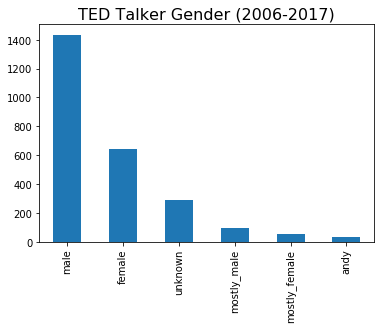

In [15]:
speaker_gen = pd.Series(ted_speaker)
ted['speaker_gender'] = speaker_gen
ted[['main_speaker', 'speaker_gender']]
speaker_gender = ted.speaker_gender
speaker_gender.value_counts().plot('bar')
plt.title("TED Talker Gender (2006-2017)", fontsize='16')

In [16]:
speaker_gender.value_counts()

male             1435
female            643
unknown           290
mostly_male        94
mostly_female      55
andy               33
Name: speaker_gender, dtype: int64

In [17]:
# isolate gender and views columns
ted[['speaker_gender', 'views']].head()
gender_views = ted[['speaker_gender', 'views']]

In [18]:
# turn males into 1, females into -1, and other classes into 0. 
num_gender = []
for gender in speaker_gender:
    if gender == 'male':
        num_gender.append(1)
    elif gender == 'female':
        num_gender.append(-1)
    elif gender == 'unknown' or gender == 'mostly_male' or gender == 'mostly_femal' or gender == 'andy':
        num_gender.append(0)

In [19]:
# turn numerical gender list into pandas series and inspect results
num_gender = pd.Series(num_gender)
num_gender.tail()
#speaker_gender.tail()

2490    1
2491    1
2492   -1
2493    1
2494   -1
dtype: int64

In [20]:
# attach numerical gender 
ted['num_gender'] = num_gender
ted.to_excel("ted_gender.xlsx")
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,speaker_gender,num_gender
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,male,1.0
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,male,1.0
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,male,1.0
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,unknown,0.0
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,male,1.0


In [21]:
# correlations amoung gender, views, duration, and comments
import seaborn as sns
d = ted[['num_gender', 'views','duration', 'comments']]
d.corr()

,num_gender,views,duration,comments
num_gender,1.000000,0.002650,0.033118,0.046624
views,0.002650,1.000000,0.048740,0.530939
duration,0.033118,0.048740,1.000000,0.140694
comments,0.046624,0.530939,0.140694,1.000000


## 3. More PANDAS (if time)

Review the following PANDAS for ecology tutorial and pick a few topics to work on:

https://datacarpentry.org/python-ecology-lesson/

Explain your methods in words and comment your code.

#### Note the above is a good reference for basic pandas operations.

